In [1]:
! pip install qiskit

In [2]:
! pip install qiskit-machine-learning

In [3]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from qiskit import *

# External imports
from pylab import cm
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# Qiskit imports
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.visualization import circuit_drawer
#from qiskit.algorithms.optimizers import SPSA

from qiskit.circuit.library import PauliFeatureMap
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import TrainableFidelityQuantumKernel
from qiskit_machine_learning.kernels.algorithms import QuantumKernelTrainer
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.datasets import ad_hoc_data

#from qiskit.utils import QuantumInstance
#from qiskit_machine_learning.kernels import QuantumKernel

import random
import time
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/conda/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df = pd.read_csv('Thesis IBM Dataset.csv')
df.head()

,Date,Time,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),State,Real State,Rain,Cloudy,Sunny,Fog
0,27-06-2023,08:00,27,32,21,87,3.0,1003,Cloudy,Cloudy,0.0,1,0,0
1,27-06-2023,09:00,27,32,22,86,9.0,1003,Cloudy,Cloudy,0.0,1,0,0
2,27-06-2023,10:00,28,34,23,90,3.0,1003,Cloudy,Rain,1.0,1,0,0
3,27-06-2023,11:00,28,33,30,85,9.0,1003,Isolated Thunderstroms,Rain,1.0,1,0,0
4,27-06-2023,12:00,27,32,53,90,9.0,1003,Rain,Sunny,0.0,0,1,0


In [5]:
df.drop(columns=['Date'], inplace=True)
#df.drop(columns=['Temperature(C)'], inplace=True)
df

,Time,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),State,Real State,Rain,Cloudy,Sunny,Fog
0,08:00,27,32,21,87,3.0,1003,Cloudy,Cloudy,0.0,1,0,0
1,09:00,27,32,22,86,9.0,1003,Cloudy,Cloudy,0.0,1,0,0
2,10:00,28,34,23,90,3.0,1003,Cloudy,Rain,1.0,1,0,0
3,11:00,28,33,30,85,9.0,1003,Isolated Thunderstroms,Rain,1.0,1,0,0
4,12:00,27,32,53,90,9.0,1003,Rain,Sunny,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,19:00,20,20,1,77,8.0,1014,Clear,Clear,0.0,0,1,0
4500,20:00,19,19,1,80,14.0,1015,Clear,Clear,0.0,0,1,0
4501,21:00,19,19,2,82,14.0,1015,Clear,Clear,0.0,0,1,0
4502,22:00,18,18,2,83,14.0,1015,Clear,Clear,0.0,0,1,0


In [6]:
df.dropna(inplace=True)
df

,Time,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),State,Real State,Rain,Cloudy,Sunny,Fog
0,08:00,27,32,21,87,3.0,1003,Cloudy,Cloudy,0.0,1,0,0
1,09:00,27,32,22,86,9.0,1003,Cloudy,Cloudy,0.0,1,0,0
2,10:00,28,34,23,90,3.0,1003,Cloudy,Rain,1.0,1,0,0
3,11:00,28,33,30,85,9.0,1003,Isolated Thunderstroms,Rain,1.0,1,0,0
4,12:00,27,32,53,90,9.0,1003,Rain,Sunny,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,19:00,20,20,1,77,8.0,1014,Clear,Clear,0.0,0,1,0
4500,20:00,19,19,1,80,14.0,1015,Clear,Clear,0.0,0,1,0
4501,21:00,19,19,2,82,14.0,1015,Clear,Clear,0.0,0,1,0
4502,22:00,18,18,2,83,14.0,1015,Clear,Clear,0.0,0,1,0


In [7]:
df.drop(columns=['Time', 'State','Real State'], inplace=True)
df

,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),Rain,Cloudy,Sunny,Fog
0,27,32,21,87,3.0,1003,0.0,1,0,0
1,27,32,22,86,9.0,1003,0.0,1,0,0
2,28,34,23,90,3.0,1003,1.0,1,0,0
3,28,33,30,85,9.0,1003,1.0,1,0,0
4,27,32,53,90,9.0,1003,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4499,20,20,1,77,8.0,1014,0.0,0,1,0
4500,19,19,1,80,14.0,1015,0.0,0,1,0
4501,19,19,2,82,14.0,1015,0.0,0,1,0
4502,18,18,2,83,14.0,1015,0.0,0,1,0


In [8]:
df.drop(columns=[ 'Cloudy','Sunny', 'Fog'], inplace=True)
df

,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),Rain
0,27,32,21,87,3.0,1003,0.0
1,27,32,22,86,9.0,1003,0.0
2,28,34,23,90,3.0,1003,1.0
3,28,33,30,85,9.0,1003,1.0
4,27,32,53,90,9.0,1003,0.0
...,...,...,...,...,...,...,...
4499,20,20,1,77,8.0,1014,0.0
4500,19,19,1,80,14.0,1015,0.0
4501,19,19,2,82,14.0,1015,0.0
4502,18,18,2,83,14.0,1015,0.0


In [9]:
df.describe()

,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),Rain
count,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000
mean,26.287364,30.537419,24.204086,84.216744,8.966911,1010.021097,0.127915
std,4.355640,7.491821,27.919227,12.429870,3.512862,134.304567,0.334032
min,11.000000,13.000000,1.000000,43.000000,1.000000,993.000000,0.000000
25%,24.000000,24.000000,3.000000,77.000000,6.000000,1004.000000,0.000000
50%,27.000000,32.000000,13.000000,88.000000,9.000000,1007.000000,0.000000
75%,29.000000,35.000000,37.000000,94.000000,12.000000,1013.000000,0.000000
max,40.000000,64.000000,100.000000,100.000000,16.000000,10013.000000,1.000000


In [10]:
for col in df.columns:
    if (col == 'Rain'):
       
        df[col] = np.where(df[col] == 0.0, 0, 1)
df

,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),Rain
0,27,32,21,87,3.0,1003,0
1,27,32,22,86,9.0,1003,0
2,28,34,23,90,3.0,1003,1
3,28,33,30,85,9.0,1003,1
4,27,32,53,90,9.0,1003,0
...,...,...,...,...,...,...,...
4499,20,20,1,77,8.0,1014,0
4500,19,19,1,80,14.0,1015,0
4501,19,19,2,82,14.0,1015,0
4502,18,18,2,83,14.0,1015,0


In [11]:
def create_training_and_testing_data_sub(df_, DATA_SIZE_):
    data_size = DATA_SIZE_

    indices = np.random.choice(df.index, size=data_size, replace=False)
    subset_df = df.loc[indices]

    print(indices)

    # get the values from the last column of the subset and store them in y_subset
    y_subset = subset_df['Rain'].values

    # get the values from all other columns of the subset and store them in X_subset
    x_subset = subset_df.iloc[:, :-1].values

    # spltting the dataset into train and test set
    x_train, x_test, y_train, y_test = train_test_split(x_subset, y_subset, test_size = 0.25, random_state = 31)

    return x_train, x_test, y_train, y_test

In [12]:
NUM_OF_EXPERIMENTS = int(input("Number of experiments to run: "))
DATA_SIZE = int(input("Size of dataset: "))
NUM_MAX_ITER = int(input("Number of max iterations: "))
data = []

for current_iter in range(NUM_OF_EXPERIMENTS):

    X_train, X_test, y_train, y_test = create_training_and_testing_data_sub(df, DATA_SIZE)

    data.append([X_train, X_test, y_train, y_test])

Number of experiments to run:  100
Size of dataset:  200
Number of max iterations:  1


[2234 2641  348  834 1418  626 2333 3912 3469 2921 2144 2078  418 2602
 3827 2434 2976 2099  868 1076 1259 2969 1068 2311   86 3497 3461 3513
 2532 1663 3942 4284 4196 3482 3935 1260 1321    0  796 1226 3021 3475
  328  683 4334  218  596   22 3610 1696 2459 3561 4456 4288 1509 1029
 3732  704 3555 2802 1468 1072 4148  947 2542 3570 2524 2493 3630 2327
 1618 1050 1585 2951  919 1733 3237 1808 3672 1120 1274 2606 1305 2798
 3335 4474 4087 1220 2258 1826  842 3787 2015 3577  855 1750 2655 3510
 1664 2266 1668 2702 1979 3320 4183   64 3604 1875 3836 1896 3159 3684
 3745 4003 1319 3422  952 3686 2933 2339  162 4097 1982  300 1594 1600
 4380 2849 3051 3358  875 2819 1099 1056 2319  758 4159 3622 2581 4219
 1822 1387   43 3277 1911 1684 3254 1719  283 3029  794 1212 1882  605
 1011 3264 4459 4261   93 4150 3564 1123  900 3641  939 1125 2598 2444
  895 1504  845  765 2283 2984 3104 4163 4034 2912 4346 4327 1093 3578
  406 2816 3645 3186 3756 2381 4309  266 1164 1858 2922 2662  705 4330
 3719 

In [13]:
def find_classical_accuracy(x_train_, x_test_, y_train_, y_test_):

    svc_clf = svm.SVC(random_state = 7)
    svc_clf.fit(x_train_, y_train_)
    labels_pred = svc_clf.predict(x_test_)

    svc_accuracy = accuracy_score(y_test_, labels_pred)
    svc_score = metrics.balanced_accuracy_score(y_true=y_test_, y_pred=labels_pred)
    svc_f1_score = f1_score(y_test_, labels_pred)

    return svc_accuracy, svc_score, svc_f1_score

In [14]:
def find_classical_accuracy_dt(x_train_, x_test_, y_train_, y_test_):
    clf = DecisionTreeClassifier(random_state=42)

    # Train the classifier on the training data
    clf.fit(x_train_, y_train)

    # Make predictions on the testing data
    labels_pred = clf.predict(x_test_)

    svc_accuracy = accuracy_score(y_test_, labels_pred)
    svc_score = metrics.balanced_accuracy_score(y_true=y_test_, y_pred=labels_pred)
    svc_f1_score = f1_score(y_test_, labels_pred)

    return svc_accuracy, svc_score, svc_f1_score

In [15]:
def find_classical_accuracy_rf(x_train_, x_test_, y_train_, y_test_):
    rfc = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the classifier on the training data
    rfc.fit(X_train, y_train)


    # Make predictions on the testing data
    labels_pred = rfc.predict(x_test_)

    svc_accuracy = accuracy_score(y_test_, labels_pred)
    svc_score = metrics.balanced_accuracy_score(y_true=y_test_, y_pred=labels_pred)
    svc_f1_score = f1_score(y_test_, labels_pred)

    return svc_accuracy, svc_score, svc_f1_score

In [16]:
svc_acc = []
svc_bacc = []
svc_f1_score = []
total_time_elapsed = 0

for current_iter in range(NUM_OF_EXPERIMENTS):

    print(f"Current experiment no: {current_iter+1}")

    X_train, X_test, y_train, y_test = data[current_iter][0], data[current_iter][1], data[current_iter][2], data[current_iter][3]

    accuracy_svm, balanced_accuracy_svm, classical_f1_score = find_classical_accuracy(X_train, X_test, y_train, y_test)
    svc_acc.append(accuracy_svm)
    svc_bacc.append(balanced_accuracy_svm)
    svc_f1_score.append(classical_f1_score)

    print(f"Accuracy, Balanced Accuracy and F1 Score Classical SVM: {accuracy_svm}, {balanced_accuracy_svm}, {classical_f1_score}")

    print(f"-------------------------------------------------------------------------------------------------------------------")

Current experiment no: 1
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.92, 0.5, 0.0
-------------------------------------------------------------------------------------------------------------------
Current experiment no: 2
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.9, 0.5, 0.0
-------------------------------------------------------------------------------------------------------------------
Current experiment no: 3
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.86, 0.5, 0.0
-------------------------------------------------------------------------------------------------------------------
Current experiment no: 4
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.82, 0.5, 0.0
-------------------------------------------------------------------------------------------------------------------
Current experiment no: 5
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.86, 0.5, 0.0
---------------------------------------------------------

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
print(svc_acc)
print("For Classical SVM:")
print("Mean Accuracy:       ", np.array(svc_acc).mean())
print("Standard deviation:  ", np.array(svc_acc).std())
print("Minimum Accuracy:    ", np.array(svc_acc).min())
print("Maximum Accuracy:    ", np.array(svc_acc).max())
svc_avg = np.array(svc_acc).mean()
svc_min = np.array(svc_acc).min()
svc_max = np.array(svc_acc).max()

[0.92, 0.9, 0.86, 0.82, 0.86, 0.88, 0.92, 0.88, 0.8, 0.86, 0.86, 0.9, 0.8, 0.92, 0.94, 0.88, 0.88, 0.9, 0.84, 0.86, 0.94, 0.9, 0.84, 0.84, 0.86, 0.92, 0.78, 0.9, 0.88, 0.86, 0.82, 0.9, 0.82, 0.96, 0.92, 0.88, 0.9, 0.82, 0.92, 0.84, 0.92, 0.84, 0.84, 0.88, 0.92, 0.78, 0.78, 0.82, 0.86, 0.84, 0.82, 0.9, 0.92, 0.9, 0.9, 0.86, 0.86, 0.94, 0.88, 0.9, 0.88, 0.86, 0.86, 0.88, 0.9, 0.8, 0.96, 0.88, 0.92, 0.86, 0.88, 0.98, 0.86, 0.88, 0.88, 0.94, 0.84, 0.84, 0.92, 0.92, 0.94, 0.78, 0.92, 0.86, 0.9, 0.94, 0.84, 0.84, 0.88, 0.82, 0.82, 0.92, 0.9, 0.88, 1.0, 0.94, 0.8, 0.9, 0.94, 0.82]
For Classical SVM:
Mean Accuracy:        0.8772000000000001
Standard deviation:   0.046391378509373915
Minimum Accuracy:     0.78
Maximum Accuracy:     1.0


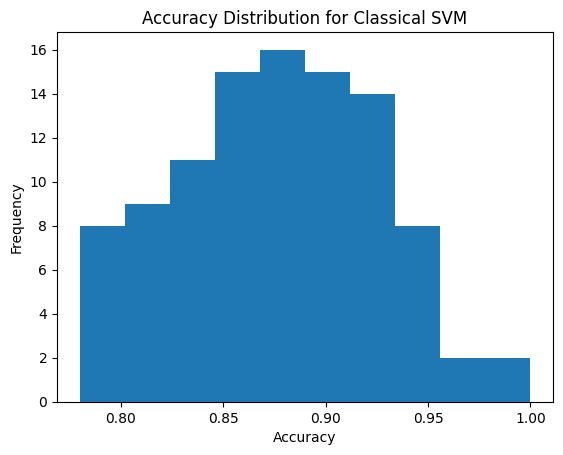

In [18]:
plt.hist(np.array(svc_acc))
plt.title('Accuracy Distribution for Classical SVM')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

In [19]:
print(svc_bacc)
print("For Classical SVM:")
print("Mean Balanced Accuracy:       ", np.array(svc_bacc).mean())
print("Standard deviation:  ", np.array(svc_bacc).std())
print("Minimum Balanced Accuracy:    ", np.array(svc_bacc).min())
print("Maximum Balanced Accuracy:    ", np.array(svc_bacc).max())
svc_avg = np.array(svc_bacc).mean()
svc_min = np.array(svc_bacc).min()
svc_max = np.array(svc_bacc).max()

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5]
For Classical SVM:
Mean Balanced Accuracy:        0.505
Standard deviation:   0.049749371855330994
Minimum Balanced Accuracy:     0.5
Maximum Balanced Accuracy:     1.0


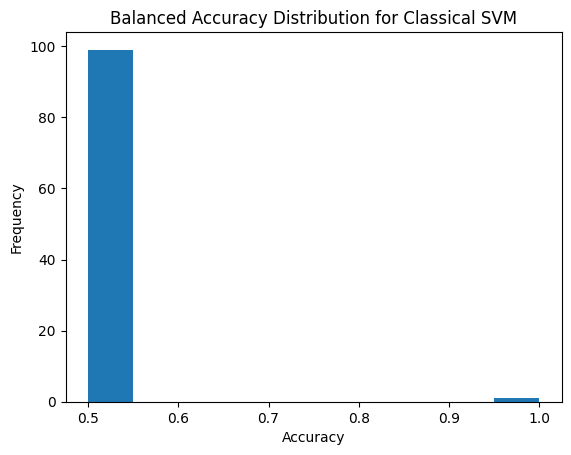

In [20]:
plt.hist(np.array(svc_bacc))
plt.title('Balanced Accuracy Distribution for Classical SVM')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

In [21]:
from sklearn.tree import DecisionTreeClassifier

svc_acc_dt = []
svc_bacc_dt = []
svc_f1_score_dt = []

for current_iter in range(NUM_OF_EXPERIMENTS):

    print(f"Current experiment no: {current_iter+1}")

    X_train, X_test, y_train, y_test = data[current_iter][0], data[current_iter][1], data[current_iter][2], data[current_iter][3]

    accuracy_svm, balanced_accuracy_svm, classical_f1_score = find_classical_accuracy_dt(X_train, X_test, y_train, y_test)
    svc_acc_dt.append(accuracy_svm)
    svc_bacc_dt.append(balanced_accuracy_svm)
    svc_f1_score_dt.append(classical_f1_score)

    print(f"Accuracy, Balanced Accuracy and F1 Score Classical SVM: {accuracy_svm}, {balanced_accuracy_svm}, {classical_f1_score}")

    print(f"-----------------------------------------------------------------------------------------------------------")

Current experiment no: 1
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.78, 0.5380434782608696, 0.15384615384615385
-----------------------------------------------------------------------------------------------------------
Current experiment no: 2
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.84, 0.7333333333333334, 0.42857142857142855
-----------------------------------------------------------------------------------------------------------
Current experiment no: 3
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.8, 0.584717607973422, 0.2857142857142857
-----------------------------------------------------------------------------------------------------------
Current experiment no: 4
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.84, 0.5989159891598916, 0.3333333333333333
-----------------------------------------------------------------------------------------------------------
Current experiment no: 5
Accuracy, Balanced Accuracy and F1 Scor

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [22]:
print(svc_acc_dt)
print("For Classical Decision Tree:")
print("Mean Accuracy:       ", np.array(svc_acc_dt).mean())
print("Standard deviation:  ", np.array(svc_acc_dt).std())
print("Minimum Accuracy:    ", np.array(svc_acc_dt).min())
print("Maximum Accuracy:    ", np.array(svc_acc_dt).max())
svc_avg = np.array(svc_acc_dt).mean()
svc_min = np.array(svc_acc_dt).min()
svc_max = np.array(svc_acc_dt).max()

[0.78, 0.84, 0.8, 0.84, 0.84, 0.82, 0.84, 0.88, 0.72, 0.82, 0.7, 0.88, 0.86, 0.84, 0.86, 0.88, 0.88, 0.9, 0.76, 0.84, 0.88, 0.78, 0.72, 0.78, 0.82, 0.74, 0.86, 0.84, 0.82, 0.8, 0.88, 0.84, 0.74, 0.96, 0.74, 0.8, 0.76, 0.84, 0.84, 0.76, 0.8, 0.86, 0.78, 0.82, 0.8, 0.82, 0.78, 0.88, 0.84, 0.7, 0.86, 0.92, 0.8, 0.86, 0.88, 0.82, 0.86, 0.9, 0.88, 0.82, 0.8, 0.82, 0.68, 0.8, 0.94, 0.74, 0.94, 0.84, 0.92, 0.8, 0.84, 0.86, 0.88, 0.82, 0.86, 0.88, 0.72, 0.78, 0.88, 0.78, 0.8, 0.82, 0.84, 0.72, 0.86, 0.92, 0.76, 0.92, 0.92, 0.78, 0.78, 0.9, 0.9, 0.74, 0.84, 0.82, 0.72, 0.9, 0.9, 0.8]
For Classical Decision Tree:
Mean Accuracy:        0.8268000000000001
Standard deviation:   0.06008127828200729
Minimum Accuracy:     0.68
Maximum Accuracy:     0.96


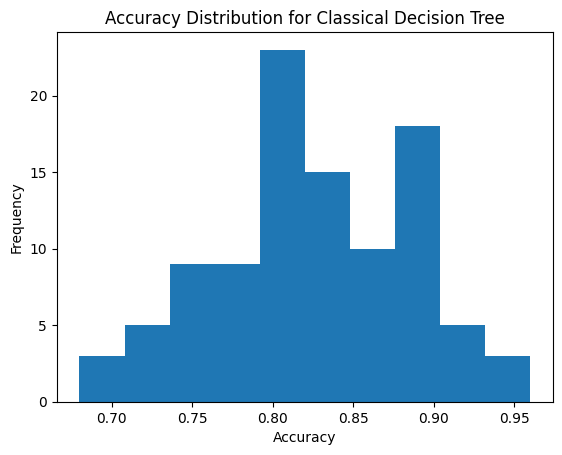

In [23]:
plt.hist(np.array(svc_acc_dt))
plt.title('Accuracy Distribution for Classical Decision Tree')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

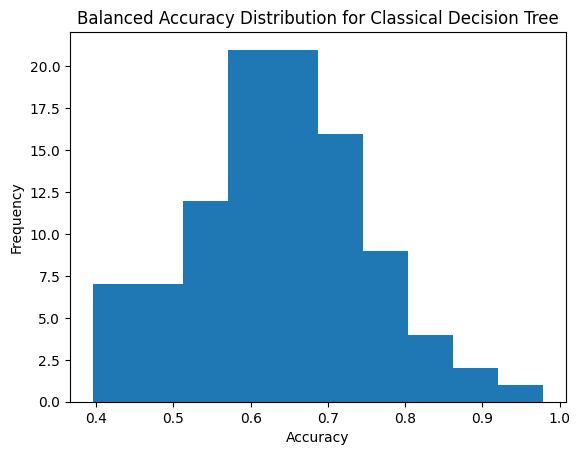

In [24]:
plt.hist(np.array(svc_bacc_dt))
plt.title('Balanced Accuracy Distribution for Classical Decision Tree')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

In [25]:
from sklearn.ensemble import RandomForestClassifier

svc_acc_rf = []
svc_bacc_rf = []
svc_f1_score_rf = []
total_time_elapsed = 0

for current_iter in range(NUM_OF_EXPERIMENTS):

    print(f"Current experiment no: {current_iter+1}")

    X_train, X_test, y_train, y_test = data[current_iter][0], data[current_iter][1], data[current_iter][2], data[current_iter][3]

    accuracy_svm, balanced_accuracy_svm, classical_f1_score = find_classical_accuracy_rf(X_train, X_test, y_train, y_test)
    svc_acc_rf.append(accuracy_svm)
    svc_bacc_rf.append(balanced_accuracy_svm)
    svc_f1_score_rf.append(classical_f1_score)

    print(f"Accuracy, Balanced Accuracy and F1 Score Classical SVM: {accuracy_svm}, {balanced_accuracy_svm}, {classical_f1_score}")

    print(f"----------------------------------------------------------------")

Current experiment no: 1
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.9, 0.6032608695652174, 0.2857142857142857
----------------------------------------------------------------
Current experiment no: 2
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.9, 0.5888888888888889, 0.2857142857142857
----------------------------------------------------------------
Current experiment no: 3
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.84, 0.4883720930232558, 0.0
----------------------------------------------------------------
Current experiment no: 4
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.84, 0.5555555555555556, 0.2
----------------------------------------------------------------
Current experiment no: 5
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.82, 0.5365448504983389, 0.18181818181818182
----------------------------------------------------------------
Current experiment no: 6
Accuracy, Balanced Accuracy and F1 Score Classical 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.98, 0.98, 0.0
----------------------------------------------------------------
Current experiment no: 96
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.92, 0.6453900709219859, 0.3333333333333333
----------------------------------------------------------------
Current experiment no: 97
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.74, 0.4625, 0.0
----------------------------------------------------------------
Current experiment no: 98
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.9, 0.5, 0.0
----------------------------------------------------------------
Current experiment no: 99
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.94, 0.5, 0.0
----------------------------------------------------------------
Current experiment no: 100
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.84, 0.5989159891598916, 0.3333333333333333
-------------------------------------------------------

In [26]:
print(svc_acc_rf)
print("For Classical SVM:")
print("Mean Accuracy:       ", np.array(svc_acc_rf).mean())
print("Standard deviation:  ", np.array(svc_acc_rf).std())
print("Minimum Accuracy:    ", np.array(svc_acc_rf).min())
print("Maximum Accuracy:    ", np.array(svc_acc_rf).max())
svc_avg = np.array(svc_acc_rf).mean()
svc_min = np.array(svc_acc_rf).min()
svc_max = np.array(svc_acc_rf).max()

[0.9, 0.9, 0.84, 0.84, 0.82, 0.84, 0.86, 0.92, 0.82, 0.84, 0.8, 0.86, 0.84, 0.92, 0.96, 0.86, 0.92, 0.92, 0.82, 0.86, 0.96, 0.84, 0.78, 0.84, 0.84, 0.86, 0.84, 0.84, 0.9, 0.88, 0.84, 0.88, 0.8, 0.96, 0.82, 0.86, 0.84, 0.88, 0.98, 0.84, 0.86, 0.88, 0.8, 0.86, 0.9, 0.78, 0.78, 0.9, 0.86, 0.84, 0.82, 0.88, 0.84, 0.9, 0.92, 0.9, 0.86, 0.92, 0.92, 0.88, 0.9, 0.84, 0.76, 0.86, 0.9, 0.84, 0.96, 0.9, 0.92, 0.82, 0.86, 0.94, 0.88, 0.88, 0.94, 0.94, 0.82, 0.78, 0.9, 0.84, 0.94, 0.8, 0.84, 0.8, 0.9, 0.92, 0.82, 0.86, 0.86, 0.8, 0.8, 0.92, 0.94, 0.88, 0.98, 0.92, 0.74, 0.9, 0.94, 0.84]
For Classical SVM:
Mean Accuracy:        0.868
Standard deviation:   0.05106858133921482
Minimum Accuracy:     0.74
Maximum Accuracy:     0.98


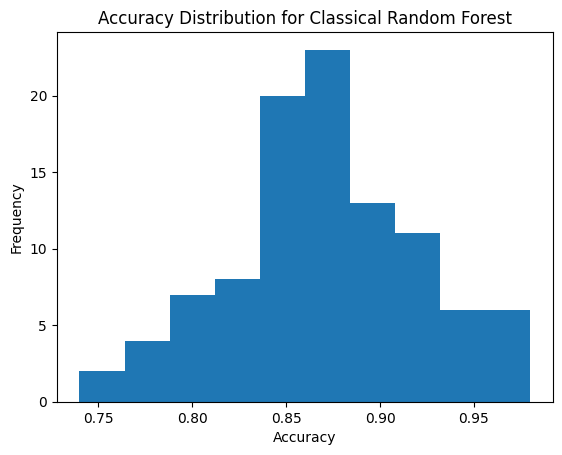

In [27]:
plt.hist(np.array(svc_acc_rf))
plt.title('Accuracy Distribution for Classical Random Forest')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

In [28]:
print(svc_bacc_rf)
print("For Classical Random Forest:")
print("Mean Balanced Accuracy:       ", np.array(svc_bacc_rf).mean())
print("Standard deviation:  ", np.array(svc_bacc_rf).std())
print("Minimum Balanced Accuracy:    ", np.array(svc_bacc_rf).min())
print("Maximum Balanced Accuracy:    ", np.array(svc_bacc_rf).max())
svc_avg = np.array(svc_bacc_rf).mean()
svc_min = np.array(svc_bacc_rf).min()
svc_max = np.array(svc_bacc_rf).max()

[0.6032608695652174, 0.5888888888888889, 0.4883720930232558, 0.5555555555555556, 0.5365448504983389, 0.5492424242424242, 0.5815217391304348, 0.7386363636363636, 0.625, 0.6677740863787375, 0.46511627906976744, 0.4777777777777778, 0.6, 0.5, 0.6666666666666666, 0.48863636363636365, 0.6666666666666666, 0.6, 0.5386904761904762, 0.5, 0.6666666666666666, 0.4666666666666667, 0.6160714285714286, 0.5505952380952381, 0.6079734219269103, 0.5815217391304348, 0.668997668997669, 0.7333333333333334, 0.6553030303030303, 0.5714285714285714, 0.5989159891598916, 0.4888888888888889, 0.5745257452574526, 0.7395833333333333, 0.44565217391304346, 0.6325757575757576, 0.5555555555555556, 0.6666666666666666, 0.875, 0.5, 0.4673913043478261, 0.6755952380952381, 0.5267857142857143, 0.5606060606060607, 0.7173913043478262, 0.5326340326340326, 0.5652680652680653, 0.7655826558265583, 0.6794019933554817, 0.5505952380952381, 0.5, 0.4888888888888889, 0.5706521739130435, 0.5, 0.6888888888888889, 0.6428571428571428, 0.559800

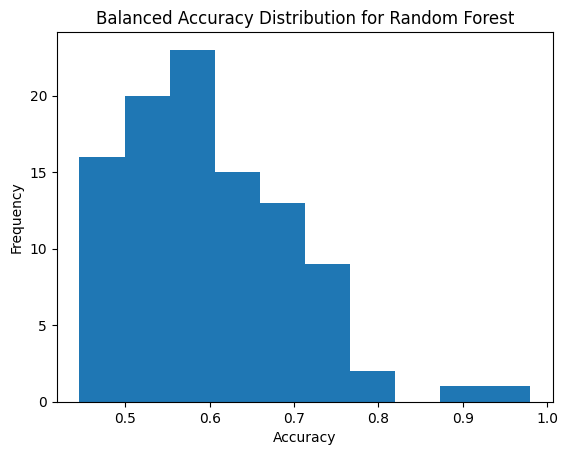

In [29]:
plt.hist(np.array(svc_bacc_rf))
plt.title('Balanced Accuracy Distribution for Random Forest')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

In [30]:
def find_closest_to_mean(arr):
    mean = sum(arr) / len(arr)  # Calculate mean of the list

    # Calculate the differences between each element and the mean, and store them in a tuple with their index
    diff_indices = [(abs(x - mean), i) for i, x in enumerate(arr)]

    # Sort the tuple by the difference values
    sorted_diff_indices = sorted(diff_indices)

    # Extract the indices of the two closest values
    index1 = sorted_diff_indices[0][1]
    index2 = sorted_diff_indices[1][1]
    return [index1, index2]

In [31]:
def find_closest_to_max(arr):
    max_val = max(arr)  # Calculate max of the list

    # Calculate the differences between each element and the max, and store them in a tuple with their index
    diff_indices = [(abs(x - max_val), i) for i, x in enumerate(arr)]

    # Sort the tuple by the difference values
    sorted_diff_indices = sorted(diff_indices)

    # Extract the indices of the two closest values
    index1 = sorted_diff_indices[0][1]
    index2 = sorted_diff_indices[1][1]
    return [index1, index2]

In [32]:
def find_closest_to_min(arr):
    min_val = min(arr)  # Calculate min of the list

    # Calculate the differences between each element and the min, and store them in a tuple with their index
    diff_indices = [(abs(x - min_val), i) for i, x in enumerate(arr)]

    # Sort the tuple by the difference values
    sorted_diff_indices = sorted(diff_indices)

    # Extract the indices of the two closest values
    index1 = sorted_diff_indices[0][1]
    index2 = sorted_diff_indices[1][1]
    return [index1, index2]

In [33]:
fm_list = []
names_fm = []
def create_feature_maps(features_):
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Z'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Z')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['ZZ'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('ZZ')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['YY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('YY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Z', 'ZZ'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Z ZZ')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Y', 'YY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Y YY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['X', 'YY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('X YY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Z', 'YY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Z YY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Y', 'XY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Y XY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['X', 'XY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('X XY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Z', 'XY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Z XY')


In [34]:
create_feature_maps(7)

In [35]:
def train_and_fit_model(x_train_, x_test_, y_train_, y_test_, fm_):

    start = time.time()

    # Building Kernel
    dse_feature_map = fm_

    dse_backend = QuantumInstance(
        Aer.get_backend('qasm_simulator'), shots=1024, seed_simulator=12345, seed_transpiler=12345
    )

    dse_kernel = QuantumKernel(feature_map=dse_feature_map, quantum_instance=dse_backend)
    qsvc = QSVC(quantum_kernel=dse_kernel)
    qsvc.fit(x_train_, y_train_)

    # Predict the labels
    labels_test = qsvc.predict(x_test_)

    accuracy_test = metrics.accuracy_score(y_true=y_test_, y_pred=labels_test)
    ba_score = metrics.balanced_accuracy_score(y_true=y_test_, y_pred=labels_test)
    q_f1_score = f1_score(y_test_, labels_test)

    elapsed = time.time() - start

    return accuracy_test, ba_score, q_f1_score, elapsed

In [36]:
! pip install qiskit-aer

In [37]:
print("For Mean Performance: ")
indices_mean = find_closest_to_mean(svc_bacc)
print(indices_mean)

q_ba, q_a, q_f1 = [], [], []
svc_ba, svc_a, svc_f1 = [], [], []
dt_ba, dt_a, dt_f1 = [], [], []
rf_ba, rf_a, rf_f1 = [], [], []

for fm in fm_list:
    qba, qa, qf = [], [], []
    for idx in indices_mean:
        X_train, X_test, y_train, y_test = data[idx]
        acc, bacc, f1, elapsed = train_and_fit_model(X_train, X_test, y_train, y_test, fm)
        print(f"QSVM Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: {acc}, {bacc}, {f1}, {elapsed}")
        qba.append(bacc)
        qa.append(acc)
        qf.append(f1)
    q_ba.append(qba)
    q_a.append(qa)
    q_f1.append(qf)
    svc_ba.append(svc_bacc[idx])
    svc_a.append(svc_acc[idx])
    svc_f1.append(svc_f1_score[idx])
    dt_ba.append(svc_bacc_dt[idx])
    dt_a.append(svc_acc_dt[idx])
    dt_f1.append(svc_f1_score_dt[idx])
    rf_ba.append(svc_bacc_rf[idx])
    rf_a.append(svc_acc_rf[idx])
    rf_f1.append(svc_f1_score_rf[idx])

print("\n")
print(sum(svc_ba))
print(len(svc_ba))
print(svc_ba)
print(f"Averge Balanced Accuracy for SVM: {sum(svc_ba)/len(svc_ba)}")
print(f"Average Accuracy for SVM: {sum(svc_a)/len(svc_a)}")
print(f"Average F1 Score for SVM: {sum(svc_f1)/len(svc_f1)}")
print("\n");
print(f"Averge Balanced Accuracy for Decision Tree: {sum(dt_ba)/len(dt_ba)}")
print(f"Average Accuracy for Pauli Decision Tree: {sum(dt_a)/len(dt_a)}")
print(f"Average F1 Score for Pauli Decision Tree: {sum(dt_f1)/len(dt_f1)}")
print("\n");
print(f"Averge Balanced Accuracy for Random Forest: {sum(rf_ba)/len(rf_ba)}")
print(f"Average Accuracy for Pauli Random Forest: {sum(rf_a)/len(rf_a)}")
print(f"Average F1 Score for Pauli Random Forest: {sum(rf_f1)/len(rf_f1)}")
print("\n");
for i in range(len(fm_list)):
    print(f"Averge Balanced Accuracy for Pauli {names_fm[i]}: {sum(q_ba[i])/len(q_ba[i])}")
    print(f"Average Accuracy for Pauli {names_fm[i]}: {sum(q_a[i])/len(q_a[i])}")
    print(f"Average F1 Score for Pauli {names_fm[i]}: {sum(q_f1[i])/len(q_f1[i])}")
    print("\n")

For Mean Performance: 
[0, 1]
Traceback (most recent call last):
  Cell In[37], line 14
    acc, bacc, f1, elapsed = train_and_fit_model(X_train, X_test, y_train, y_test, fm)
  Cell In[35], line 8 in train_and_fit_model
    dse_backend = QuantumInstance(
NameError: name 'QuantumInstance' is not defined

Use %tb to get the full traceback.


In [ ]:
df['Rain'].value_counts(0)

In [ ]:
df['Rain'].value_counts(2)